In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sales = pd.read_csv(r"D:/sales.csv",parse_dates=["date"])

In [11]:
sales.head()

,Account Number,Account Name,sku,category,quantity,unit price,ext price,date
0,803666,Fritsch-Glover,HX-24728,Belt,1,98.98,98.98,2014-09-28 11:56:02
1,64898,O'Conner Inc,LK-02338,Shirt,9,34.80,313.20,2014-04-24 16:51:22
2,423621,Beatty and Sons,ZC-07383,Shirt,12,60.24,722.88,2014-09-17 17:26:22
3,137865,"Gleason, Bogisich and Franecki",QS-76400,Shirt,5,15.25,76.25,2014-01-30 07:34:02
4,435433,Morissette-Heathcote,RU-25060,Shirt,19,51.83,984.77,2014-08-24 06:18:12


In [30]:
sales["unit price"].describe()

count    1000.000000
mean       54.066430
std        26.068011
min        10.010000
25%        31.187500
50%        53.240000
75%        75.100000
max       100.000000
Name: unit price, dtype: float64

In [27]:
report = pd.pivot_table(sales,index=["Account Name"],values=["quantity","ext price"],columns=["category"],aggfunc=[np.sum],fill_value="-",margins=True)

In [32]:
report.head()

sum                                      \
                              quantity                   ext price           
category                          Belt Shirt Shoes   All      Belt   Shirt   
Account Name                                                                 
Abbott PLC                           -     -    19  19.0         -       -   
Abbott, Rogahn and Bednar            -    18     -  18.0         -   615.6   
Abshire LLC                          -    18     2  20.0         -  720.18   
Altenwerth, Stokes and Paucek        -    13     -  13.0         -  843.31   
Ankunding-McCullough                 -     2     -   2.0         -   132.3   

                                               
                                               
category                        Shoes     All  
Account Name                                   
Abbott PLC                     755.44  755.44  
Abbott, Rogahn and Bednar           -  615.60  
Abshire LLC                     90.34  810.52  
Altenwerth, Stokes and Paucek       -  843.31  
Ankunding-McCullough                -  132.30

In [34]:
customer = sales[["Account Name","ext price","date"]]

In [82]:
sales_totals = customer.groupby(["Account Name"]).sum().sort_values(ascending=False,by="ext price")
sales_totals.head()

,ext price
Account Name,
D'Amore PLC,3529.41
Wilderman Group,3466.92
"Hilll, Schultz and Braun",3390.29
Kuvalis-Roberts,3296.00
Mills Inc,2852.69


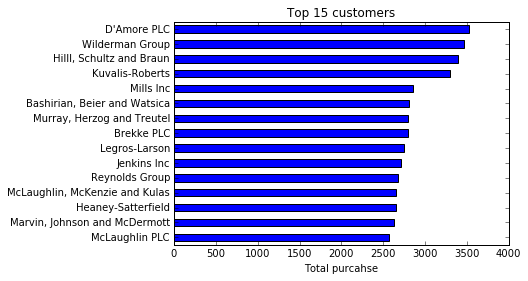

In [88]:
sales_totals[:15].sort_values(ascending=True,by="ext price").plot(kind="barh",legend=None,title="Top 15 customers")
plt.xlabel("Total purcahse")
plt.ylabel("")

In [90]:
customers = sales[['Account Name','category','ext price','date']]
customers.head()

,Account Name,category,ext price,date
0,Fritsch-Glover,Belt,98.98,2014-09-28 11:56:02
1,O'Conner Inc,Shirt,313.20,2014-04-24 16:51:22
2,Beatty and Sons,Shirt,722.88,2014-09-17 17:26:22
3,"Gleason, Bogisich and Franecki",Shirt,76.25,2014-01-30 07:34:02
4,Morissette-Heathcote,Shirt,984.77,2014-08-24 06:18:12


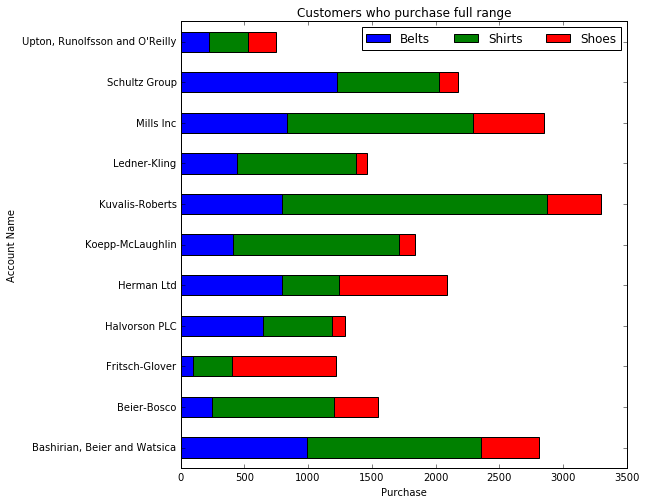

In [113]:
category_sales = customers.groupby(["Account Name","category"]).sum()

category_sales.unstack().dropna().plot(kind="barh",
                                       stacked=True,
                                       title="Customers who purchase full range",
                                       figsize=(8,8))

plt.xlabel("Purchase")

plt.legend(["Belts","Shirts","Shoes"],
           loc= 1,ncol=4)

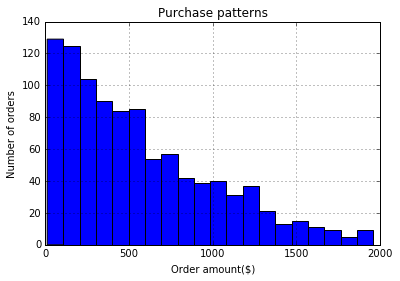

In [120]:
purchase_pattern = sales[["ext price","date"]]
purchase_pattern["ext price"].hist(bins=20)
plt.title("Purchase patterns")
plt.xlabel("Order amount($)")
plt.ylabel("Number of orders")


In [121]:
purchase_pattern = purchase_pattern.set_index("date")

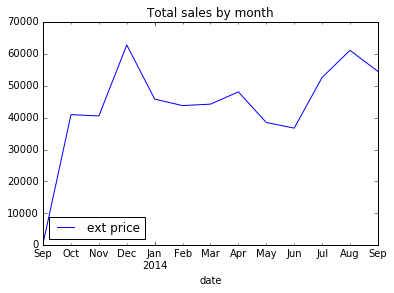

In [131]:
purchase_pattern.resample("M").sum().plot(title="Total sales by month")